In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv("Advertising.csv")

In [142]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA

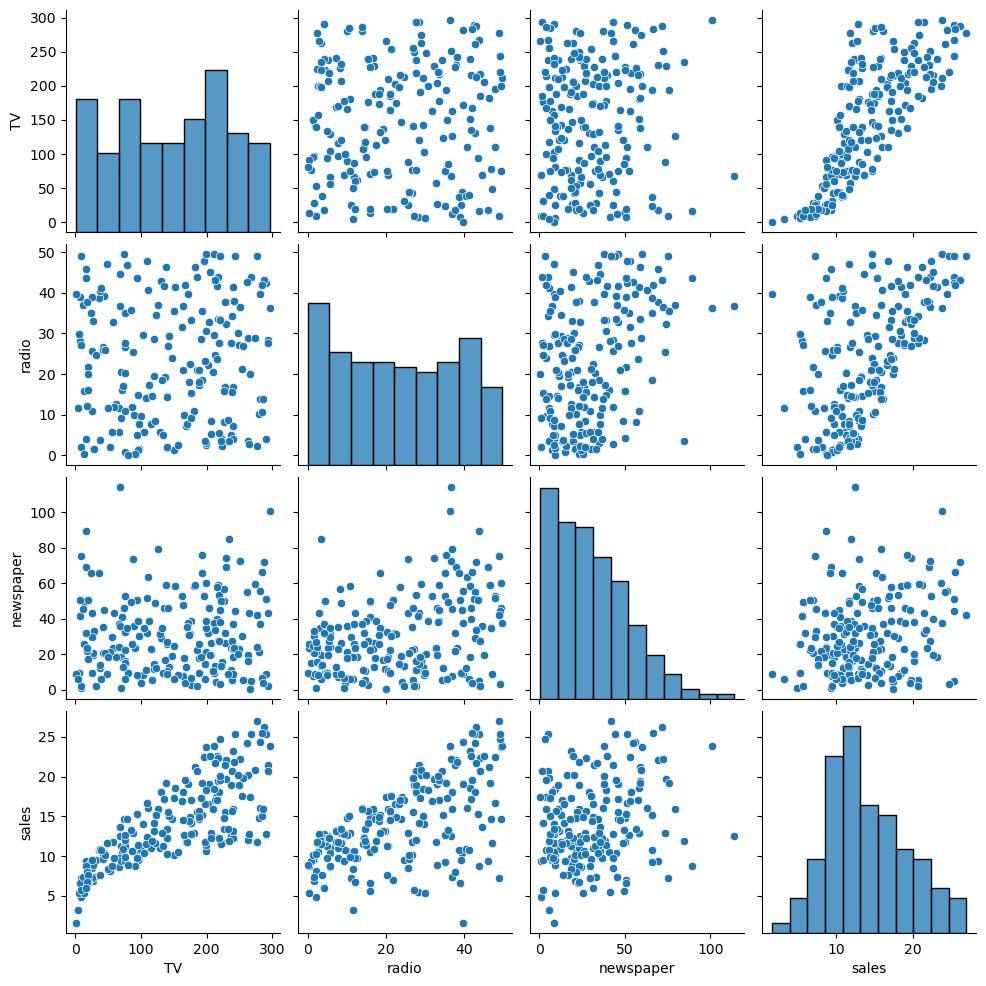

In [143]:
sns.pairplot(data=df)

## np.polyfit

In [144]:
X = df["TV"]
y = df["sales"]

In [145]:
expenses = np.linspace(0,300,100)

### 1.derece

In [146]:
np.polyfit(X, y, 1)

array([0.04753664, 7.03259355])

In [147]:
sales = 0.04753664 * expenses + 7.03259355 #ax+b

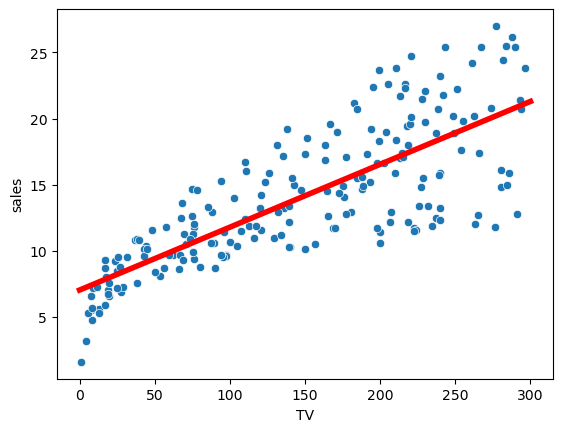

In [148]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(expenses, sales, c="red", lw=4)

### 2.Derece

In [149]:
np.polyfit(X,y,2) 

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

In [150]:
sales = -6.84693373e-05 * expenses**2 + 6.72659270e-02 * expenses + 6.11412013e+00 #ax^2 + bx + c

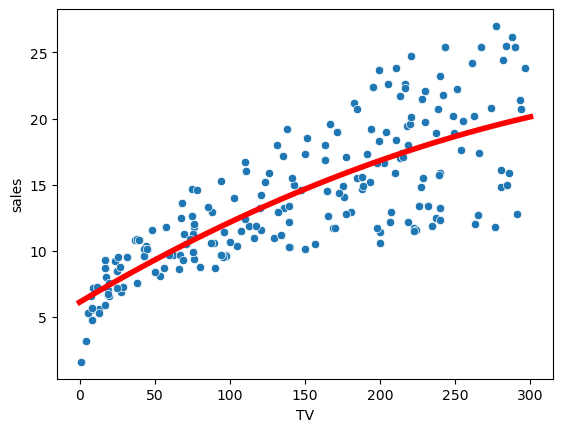

In [151]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(expenses, sales, c="red", lw=4)

## 3.Derece

In [152]:
np.polyfit(X,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

In [153]:
sales = 5.57199796e-07 * expenses**3 + -3.15222433e-04*expenses**2 + 9.64341770e-02*expenses + 5.42010655e+00

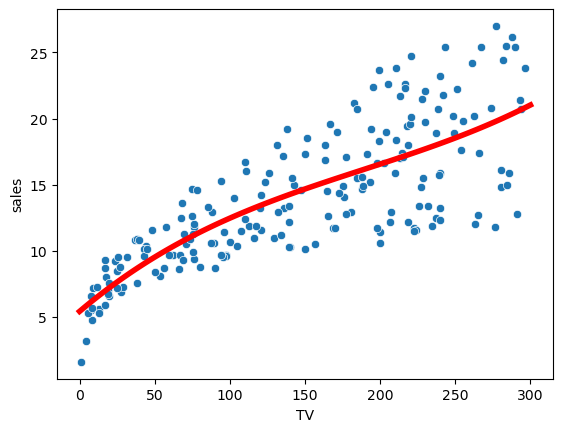

In [154]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(expenses, sales, c="red", lw=4)

In [155]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [156]:
#np.polyfit(X,y,3)
# işe yaramaz

## Train test split

In [157]:
x = df.drop("sales",axis= 1)
y= df["sales"]

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

## Linear Model

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression()

In [162]:
model.fit(X_train,y_train)

LinearRegression()

In [163]:
pred_lin = model.predict(X_test)

## Performance

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
mae = mean_absolute_error(y_test, pred_lin)
rmse = np.sqrt(mean_squared_error(y_test,pred_lin))

In [166]:
print("MAE : ", mae)
print("RMSE : ", rmse)

MAE :  1.1843918802048923
RMSE :  1.4355426289443445


In [167]:
res_lin = y_test - pred_lin

<Axes: xlabel='sales', ylabel='sales'>

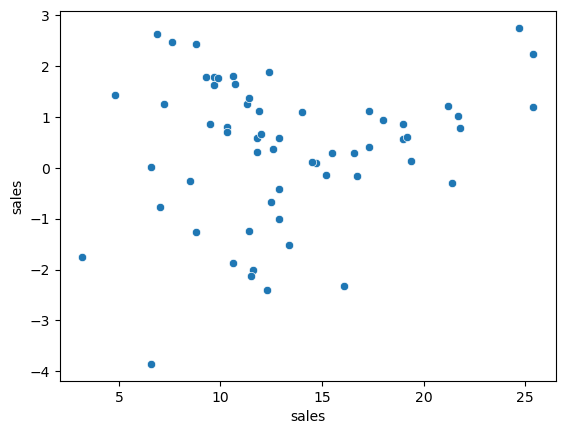

In [168]:
sns.scatterplot(x=y,  y=res_lin)

<Axes: xlabel='sales', ylabel='Count'>

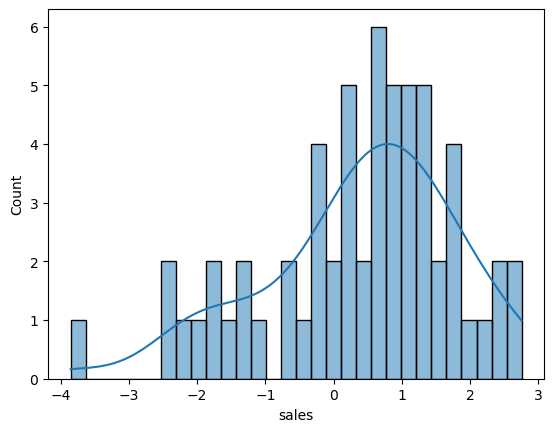

In [169]:
sns.histplot(res_lin, bins=30, kde=True)

### Final Lin Model

In [170]:
final_lin = LinearRegression()

In [171]:
final_lin.fit(X,y)

LinearRegression()

In [172]:
y_hat = final_lin.predict(X)

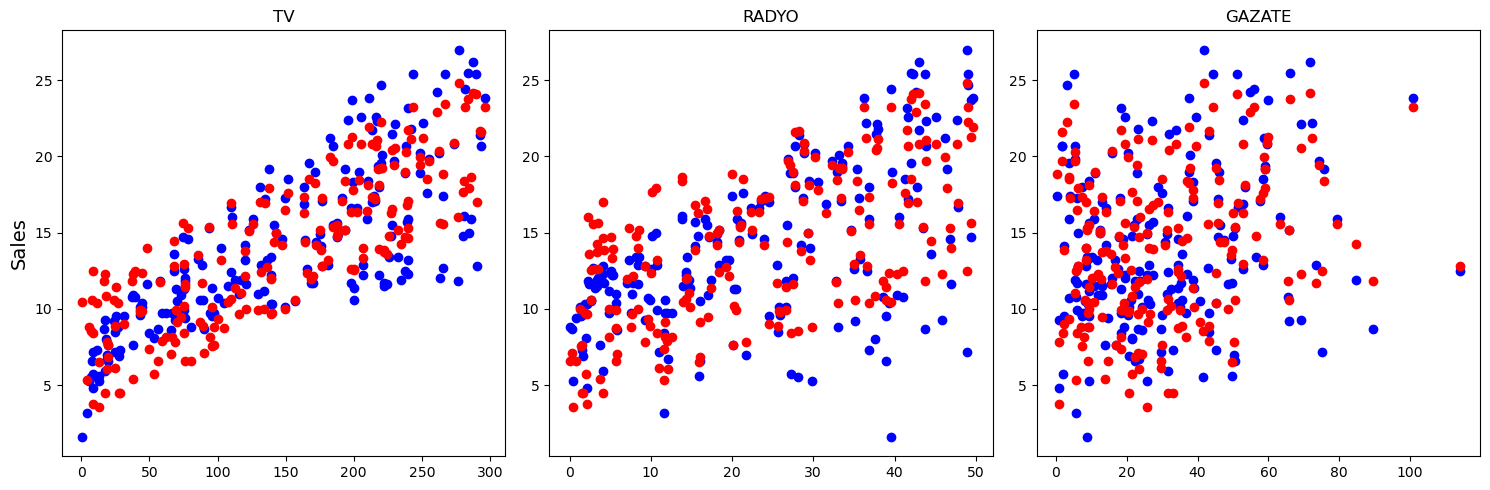

In [173]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(df["TV"], df["sales"], "o", color="blue")
ax[0].plot(df["TV"], y_hat, "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="blue")
ax[1].plot(df["radio"], y_hat, "o", color="red")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="red")
ax[2].set_title("GAZATE")

plt.tight_layout()

## Poly Model

In [174]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
poly_conv = PolynomialFeatures(degree=2,include_bias=False)

In [176]:
poly_feat = poly_conv.fit_transform(X)

In [177]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [178]:
poly_feat.shape

(200, 9)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [180]:
model_polinom = LinearRegression(fit_intercept=True)

In [181]:
model_polinom.fit(X_train,y_train)

LinearRegression()

In [182]:
pred_polinom = model_polinom.predict(X_test)

In [183]:
mae = mean_absolute_error(y_test, pred_polinom)
rmse = np.sqrt(mean_squared_error(y_test,pred_polinom))

In [184]:
print("MAE : ", mae)
print("RMSE : ", rmse)

MAE :  0.4678054953837982
RMSE :  0.6106500340084728


## En iyi Regresyon Derecesi

In [187]:
train_rmse = []
test_rmse = []

for b in range(1,10):
    poly_conv = PolynomialFeatures(degree=b, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_Rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_Rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse.append(train_Rmse)
    test_rmse.append(test_Rmse)

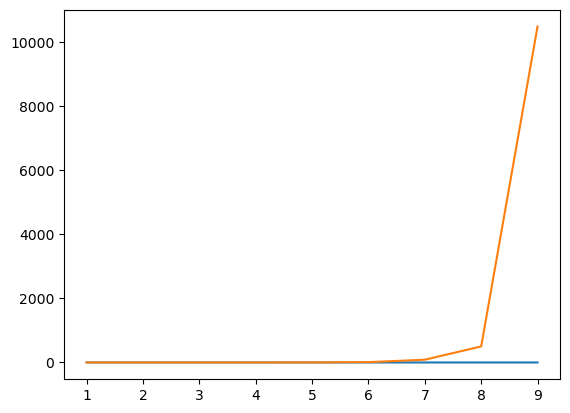

In [188]:
plt.plot(range(1,10), train_rmse[:9], label = "Train")
plt.plot(range(1,10), test_rmse[:9], label = "Test")

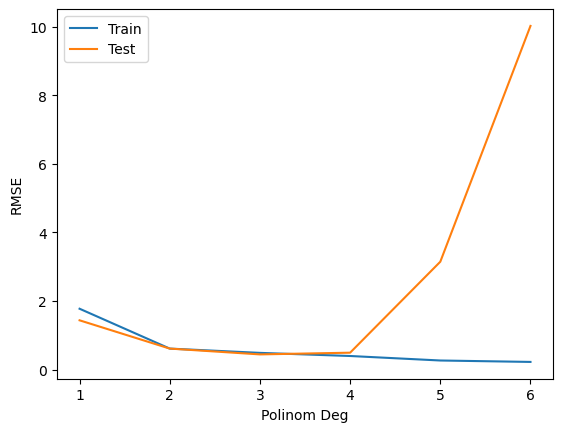

In [190]:
plt.plot(range(1,7), train_rmse[:6], label = "Train")
plt.plot(range(1,7), test_rmse[:6], label = "Test")
plt.xlabel("Polinom Deg")
plt.ylabel("RMSE")
plt.legend()

In [191]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [195]:
poly_reg= PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_final = LinearRegression()
poly_regr_final.fit(X_poly,y)

LinearRegression()

In [196]:
poly_regr_pred = poly_regr_final.predict(X_poly)

In [197]:
mae = mean_absolute_error(y, poly_regr_pred)
rmse = np.sqrt(mean_squared_error(y,poly_regr_pred))
print("MAE : ", mae)
print("RMSE : ", rmse)

MAE :  0.2740419382291833
RMSE :  0.37778612706135584


In [198]:
df["sales"].mean(), df["sales"].std()

(14.0225, 5.217456565710477)